In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_raw = pd.read_csv('loan_borowwer_data.csv', low_memory=False)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df_raw.head().transpose()

,0,1,2,3,4
credit.policy,1,1,1,1,1
purpose,debt_consolidation,credit_card,debt_consolidation,debt_consolidation,credit_card
int.rate,0.1189,0.1071,0.1357,0.1008,0.1426
installment,829.1,228.22,366.86,162.34,102.92
log.annual.inc,11.3504,11.0821,10.3735,11.3504,11.2997
dti,19.48,14.29,11.63,8.1,14.97
fico,737,707,682,712,667
days.with.cr.line,5639.96,2760,4710,2699.96,4066
revol.bal,28854,33623,3511,33667,4740
revol.util,52.1,76.7,25.6,73.2,39.5


<AxesSubplot:>

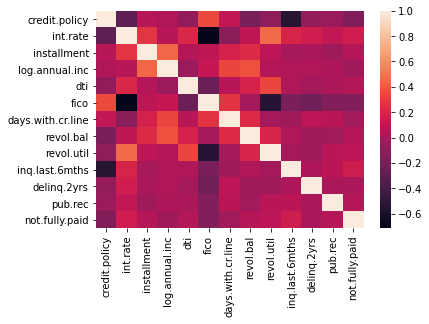

In [5]:
heatmap(df_raw.corr())

In [6]:
policy_lv = LabelEncoder()
policy_lv.fit(df_raw['purpose'])
df_num = df_raw.copy()
df_num['purpose'] = policy_lv.transform(df_num['purpose'])

In [7]:
trainX, testX, trainY, testY = train_test_split(df_num.drop('not.fully.paid', axis=1), df_num['not.fully.paid'], random_state=8, test_size=0.2)


In [8]:
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def model_results(trainX, testX, trainY, testY):
    RMSEs = []
    
    model_decTree = DecisionTreeClassifier()
    model_RandFor = RandomForestClassifier()
    
    models = [model_decTree, model_RandFor]
    for model in models:
        model.fit(trainX, trainY)
        score = (accuracy_score(testY, model.predict(testX)))
        print(f'{model} : {score}')
    #return models, RMSEs

In [9]:
model_results(trainX, testX, trainY, testY)

DecisionTreeClassifier() : 0.725991649269311
RandomForestClassifier() : 0.8418580375782881


In [10]:
tmp_model_RandomForest = RandomForestClassifier()
gsCV = GridSearchCV(estimator=tmp_model_RandomForest,
                    param_grid={'n_estimators' : [1,5,10,15, 25, 50] + list(range(100, 1001,100))})
gsCV.fit(trainX, trainY)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10, 15, 25, 50, 100, 200, 300,
                                          400, 500, 600, 700, 800, 900, 1000]})

In [12]:
gsCV.best_estimator_

RandomForestClassifier(n_estimators=500)

In [13]:
FinalModel = RandomForestClassifier(n_estimators=500, n_jobs=-1).fit(trainX, trainY)

accuracy_score(testY, FinalModel.predict(testX))

0.8434237995824635